# [Multiple Plots in one figure](https://seaborn.pydata.org/tutorial/axis_grids.html)

To set up a multi-plot figure, we use the [`FacetGrid`](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid) class. This class takes a dataframe and the names of the variables that will form the row and column of the grid. It also optionally takes a `hue` and `col_wrap` parameter for more complicated subplots.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tips = sns.load_dataset("tips")  # dataset
sns.set(style="ticks")  # style
tips.info()  # info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


### [FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid)

Is the core object for creating multi-plot grids in seaborn. It takes a dataframe and the names of the variables that will form the row and column of the grid. It also optionally takes a `hue` and `col_wrap` parameter for more complicated subplots.

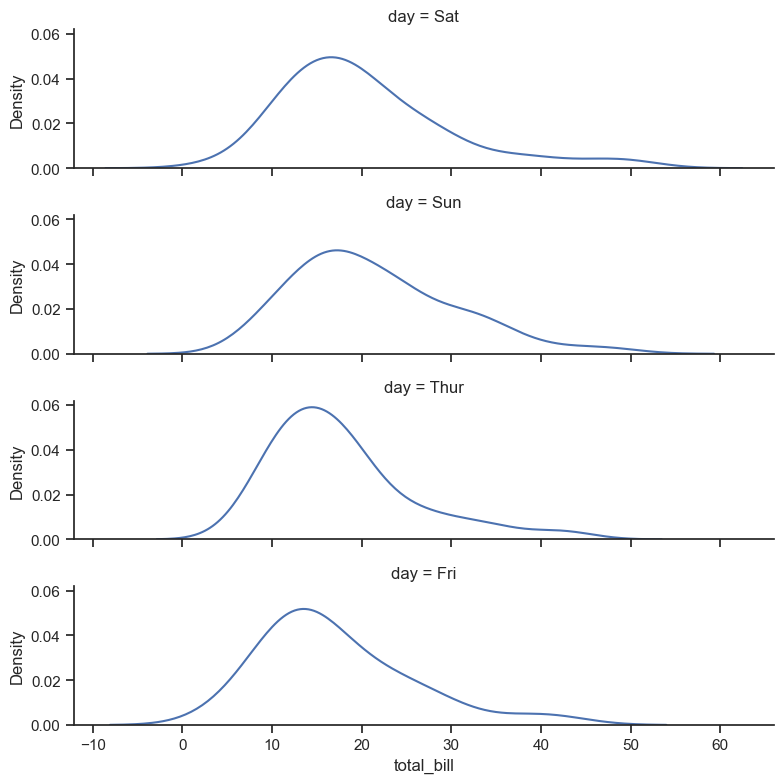

In [3]:
ordered_days = tips.day.value_counts().index
g = sns.FacetGrid(data=tips, row="day", row_order=ordered_days, height=2, aspect=4)
g.map(sns.kdeplot, "total_bill")

### Visualizing bivariate distributions

<AxesSubplot: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

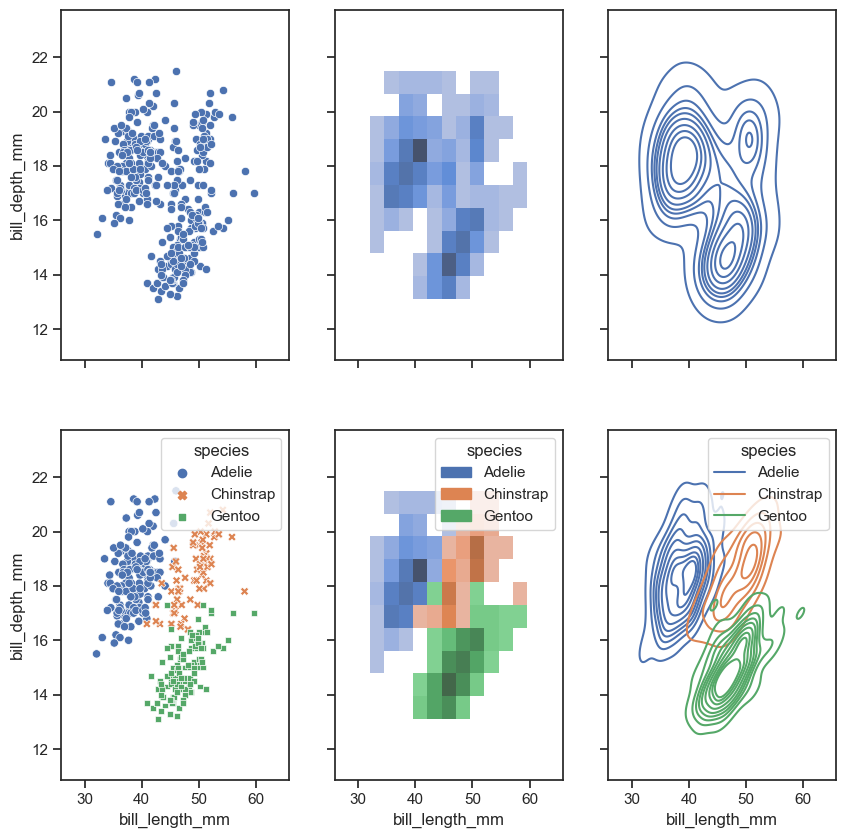

In [4]:
penguins = sns.load_dataset("penguins")
fig = plt.subplots(2, 3, figsize=(10, 10), sharex=True, sharey=True)   # create figure

sns.scatterplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", ax=fig[1][0, 0])  # type: ignore
sns.scatterplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species", style="species", ax=fig[1][1, 0])  # type: ignore

sns.histplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", ax=fig[1][0, 1])  # type: ignore
sns.histplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species", ax=fig[1][1, 1])  # type: ignore

sns.kdeplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", ax=fig[1][0, 2])  # type: ignore
sns.kdeplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species", ax=fig[1][1, 2])  # type: ignore

### Margin Plot


#### [Joinn Grid](https://seaborn.pydata.org/generated/seaborn.JointGrid.html#seaborn.JointGrid)
The first is `jointplot()`, which augments a **bivariate relatonal or distribution plot** with the marginal distributions of the two variables.

By default, `jointplot()` represents the bivariate distribution using `scatterplot()` and the marginal distributions using `histplot()`.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


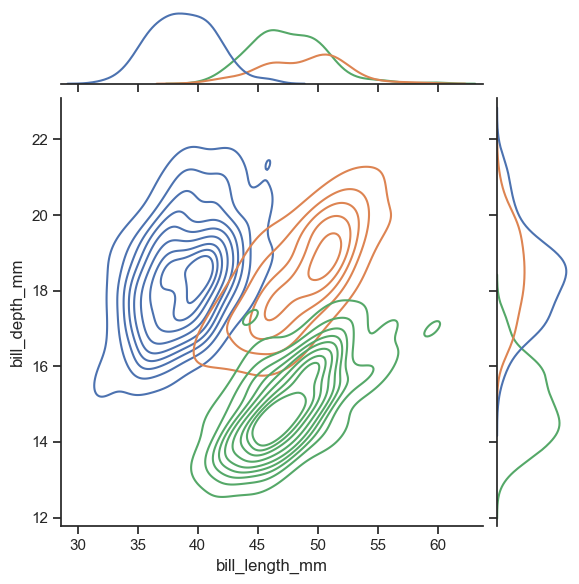

In [5]:
sns.jointplot(
    data=penguins,
    x="bill_length_mm",
    y="bill_depth_mm",
    kind="kde",
    hue="species",
)
plt.legend().remove()

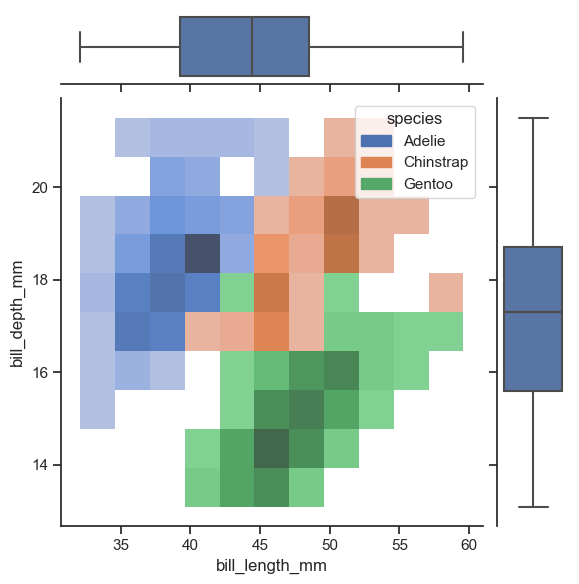

In [6]:
joint_grid: sns.JointGrid = sns.JointGrid(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")
joint_grid.plot_joint(sns.histplot)  # use a histogram for the joint plot
joint_grid.plot_marginals(sns.boxplot)  # use a boxplot to the marginal plot

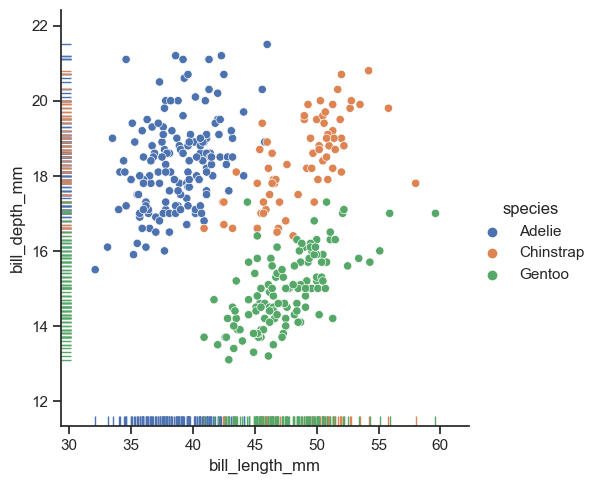

In [7]:
sns.relplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")
sns.rugplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")
plt.legend().remove()

### [PairGrid](https://seaborn.pydata.org/generated/seaborn.PairGrid.html#seaborn.PairGrid)

The `PairGrid` is an **axes-level class for drawing bivariate plots** on a matrix of subplots. It is initialized with a dataframe and the names of the variables that will form the rows and columns of the grid.

The `PairGrid` can also represent the marginal distributions of each variable on the diagonal axes. The default behavior is to show a `histplot()` of the variable’s distribution, but other plot types are also supported through the `diag_kind` parameter.

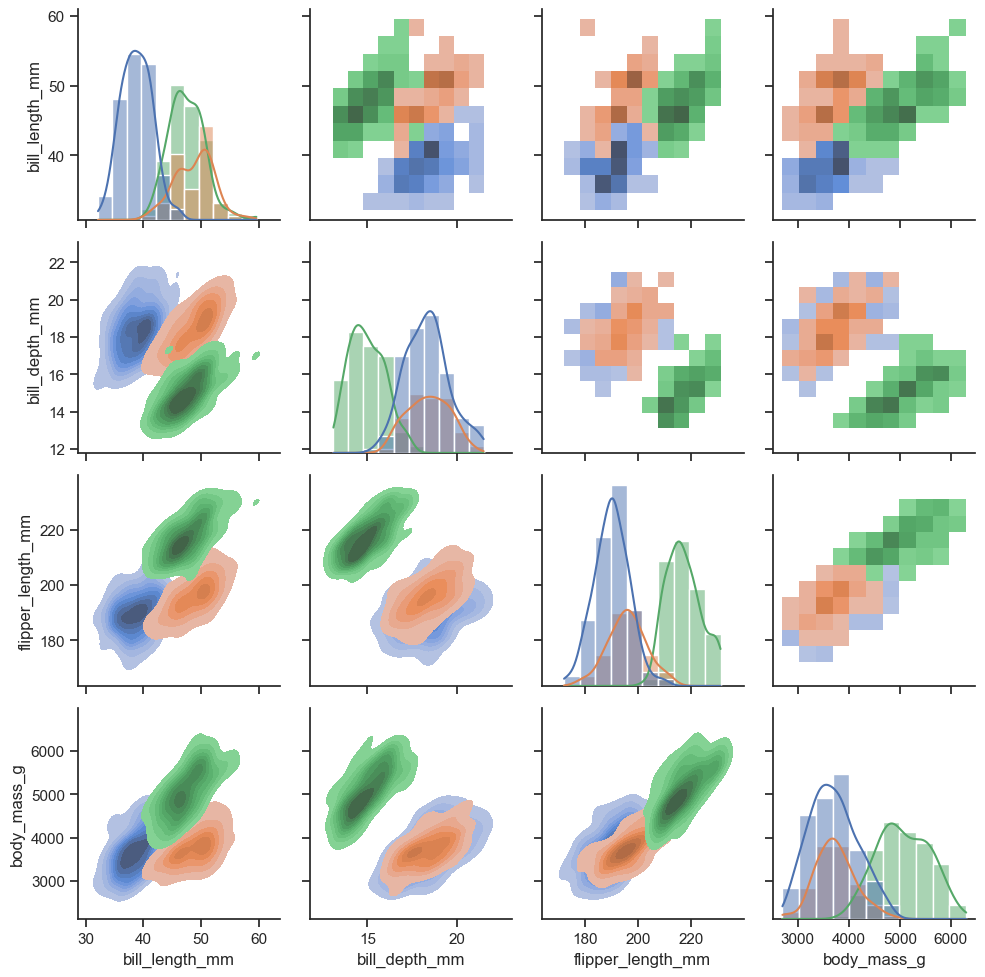

In [8]:
g = sns.PairGrid(penguins, hue="species")
g.map_upper(sns.histplot)  # above the diagonal
g.map_lower(sns.kdeplot, fill=True)  # below the diagonal
g.map_diag(sns.histplot, kde=True)  # on the diagonal